In [ ]:
# Use the train.tsv file at https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
#since the requirement was only for the train dataset i used trained dataset only
from zipfile import ZipFile
path='/content/sentiment-analysis-on-movie-reviews.zip'

with ZipFile(path,'r') as zip:
  zip.extractall(path='/content/')
link='/content/train.tsv.zip'

with ZipFile(link,'r') as obj:
  obj.extractall(path='/content/')

import pandas as pd
#Load the data, show the first five rows, check the data, and provide information on the data.
#first five rows
train_data=pd.read_csv("/content/train.tsv",sep='\t')
print('the number of rows and columns are',train_data.shape)
train_data.head()

the number of rows and columns are (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
#info about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Counts')

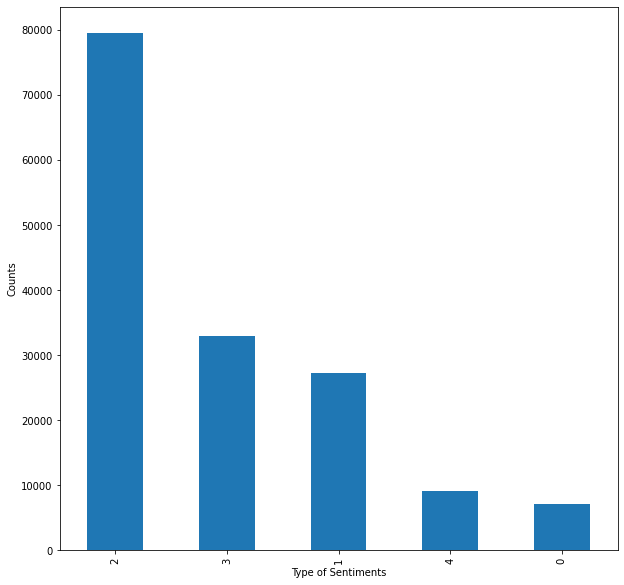

In [ ]:
#Show the distribution of review documents.

import matplotlib.pyplot as plt

a=train_data['Sentiment'].value_counts()
print(type(a))

a.plot(kind="bar",figsize=(10,10))
plt.xlabel('Type of Sentiments')
plt.ylabel('Counts')


In [ ]:
#Generate the document term matrix by using scikitlearn’s CountVectorizer. From nltk.tokenizer import RegexpTokenizer. ‘Sentiment’ is the data. Train, test and split.
#refernce https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.feature_extraction.text.countvectorizer
#more code refernce to use tokenizer in vectorization https://predictivehacks.com/tokenizer-for-nlp-tasks/ http://jonathansoma.com/lede/foundations/classes/text%20processing/tf-idf/
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk import RegexpTokenizer

# splitting the data as x and y for further steps

#first tokennization:
#format refernce https://content.breatheco.de/en/lesson/regex-tutorial-regular-expression-examples
#since the data only has letters and digits i am tokenizing the data on that basis
tokenizer=RegexpTokenizer(r'[(a-z)\(A-Z)\(0-9)]+')
#ssince the code is running for a long time i used the stop words
vec = CountVectorizer(stop_words='english',tokenizer=tokenizer.tokenize)
Vectorised_data = vec.fit_transform(train_data['Phrase'])

print(Vectorised_data)







  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [ ]:
#training and then splitting the data 

from sklearn.model_selection import train_test_split

X=Vectorised_data
y=train_data['Sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [ ]:
#-Import the MultinomialNB module and create an MNB classifier object using the MultinomialNB() function.
#reference https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()

model=clf.fit(X_train,y_train)

predictions=clf.predict(X_test)

print(predictions)

from sklearn import metrics

accy_score=metrics.accuracy_score(y_test, predictions)

print(accy_score)

# code from https://colab.research.google.com/drive/1h37OMhJNVVfZKkYFMqw-J25G8Zk1qv_C#scrollTo=A2Hcih0Pq_Ok
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,predictions)
print(cm)
class_report=classification_report(y_test,predictions)
print(class_report)



[2 4 2 ... 2 3 2]
0.6064975009611688
[[  588  1032   430    57     6]
 [  505  3417  3826   446    34]
 [  169  2093 18609  2525   192]
 [   28   406  3985  4977   645]
 [    3    46   467  1528   804]]
              precision    recall  f1-score   support

           0       0.45      0.28      0.35      2113
           1       0.49      0.42      0.45      8228
           2       0.68      0.79      0.73     23588
           3       0.52      0.50      0.51     10041
           4       0.48      0.28      0.36      2848

    accuracy                           0.61     46818
   macro avg       0.52      0.45      0.48     46818
weighted avg       0.59      0.61      0.59     46818



**OUTCOME**:After using the CountVectorizer we can see that the  accuracy is 60.64% and the precision and recall are 52% and 45% respectively. In terms of Accuracy and Precision this is a good model but we need to make further enhancements to make this model even better. 

In [ ]:
#Use TfidfVectorizer-transformed data and split it into training and test datasets.

#code reference https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

from sklearn.feature_extraction.text import TfidfVectorizer
# i am using the stop words again as well as the REGexp tokenizer since it has not been mentioned what tokenizer i need to use and if i need to use it or not

vec_2=TfidfVectorizer(stop_words='english',tokenizer=tokenizer.tokenize)
new_vectorized=vec_2.fit_transform(train_data['Phrase'])

print(new_vectorized)

#training and then splitting the data 

from sklearn.model_selection import train_test_split

new_X=new_vectorized
new_y=train_data['Sentiment']

new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_X,new_y,test_size=0.3,random_state=42)

  (0, 12673)	0.16546434151485945
  (0, 584)	0.285603003090005
  (0, 593)	0.3409013789465552
  (0, 9065)	0.24978670579994813
  (0, 5512)	0.3439781822249572
  (0, 5751)	0.2961490235960473
  (0, 5735)	0.33975154338523134
  (0, 294)	0.32500325277581793
  (0, 3444)	0.3216020045497033
  (0, 4517)	0.3604686553005693
  (0, 11671)	0.22802711986778432
  (1, 5751)	0.41569084443588766
  (1, 5735)	0.23844685397451357
  (1, 294)	0.456192206715056
  (1, 3444)	0.451418030085731
  (1, 4517)	0.505973370754556
  (1, 11671)	0.3200712427180455
  (2, 11671)	1.0
  (4, 11671)	1.0
  (5, 5751)	0.4387731757548415
  (5, 5735)	0.2516872449022257
  (5, 294)	0.4815234830745613
  (5, 3444)	0.47648420768684807
  (5, 4517)	0.5340688776406254
  (7, 5751)	0.4387731757548415
  :	:
  (156050, 9054)	0.7155119015246983
  (156050, 11305)	0.6986005430691493
  (156051, 9054)	0.7155119015246983
  (156051, 11305)	0.6986005430691493
  (156052, 11305)	1.0
  (156053, 2271)	0.4858533355546829
  (156053, 1006)	0.4858533355546829
  (15

In [ ]:
#-Import the MultinomialNB module and create an MNB classifier object using the MultinomialNB() function.
#reference https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import MultinomialNB

clf2=MultinomialNB()

model_tfidf=clf2.fit(new_X_train,new_y_train)

predictions_new =clf2.predict(new_X_test)

print(predictions_new)

from sklearn import metrics

accy_score_tfidf=metrics.accuracy_score(new_y_test, predictions_new)

print(accy_score_tfidf)

# code from https://colab.research.google.com/drive/1h37OMhJNVVfZKkYFMqw-J25G8Zk1qv_C#scrollTo=A2Hcih0Pq_Ok
from sklearn.metrics import confusion_matrix, classification_report
cm_new=confusion_matrix(new_y_test,predictions_new)
print(cm_new)
class_report_new=classification_report(new_y_test,predictions_new)
print(class_report_new)

[2 3 2 ... 2 2 2]
0.5839847921739502
[[   81   892  1100    40     0]
 [   40  2162  5747   277     2]
 [    9   992 21034  1537    16]
 [    0   137  5928  3919    57]
 [    0    16   966  1721   145]]
              precision    recall  f1-score   support

           0       0.62      0.04      0.07      2113
           1       0.51      0.26      0.35      8228
           2       0.60      0.89      0.72     23588
           3       0.52      0.39      0.45     10041
           4       0.66      0.05      0.09      2848

    accuracy                           0.58     46818
   macro avg       0.58      0.33      0.34     46818
weighted avg       0.58      0.58      0.53     46818



After using the TfidfVectorizer we can see that the  accuracy is 58.39% and the precision and recall are 58% and 33% respectively. In terms of Accuracy and Precision this model does not perform better(classify) than the previous model and hence we need to do use some other pre proccesing steps before classifying